In [2]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

import joblib
import os

In [3]:
def import_dataset(path = '../../datasets/or_logic_dataset_1000.csv'):
    # Importar dataset

    dataset = pd.read_csv(path)

    display(dataset)

    input = dataset.iloc[:, :-1].values
    output = dataset.iloc[:, -1].values

    return input, output

input, output = import_dataset("./datasets/or_logic_dataset_1000.csv")

,Vin_0,Vin_1,Output
0,0.178189,1.705200,INDEFINIDO
1,0.158124,4.722450,HIGH
2,1.402703,4.994925,INDEFINIDO
3,0.918976,2.502358,HIGH
4,3.949922,2.554317,HIGH
...,...,...,...
995,1.174011,0.413275,LOW
996,0.380604,4.589347,HIGH
997,0.909642,4.674815,HIGH
998,1.355002,4.971789,INDEFINIDO


In [4]:
def process_dataset(input, output, path_to_save_encoder):
    # Codificar datos categoricos
    #   Los datos de salida pueden ser HIGH, LOW o INDEFINIDO, estos datos no pueden ser procesados numericamente
    #   por lo que se requiere codificarlos en variables dummy

    encoder = OneHotEncoder(sparse_output=False)

    # En este caso lo unico que debo codificar es la salida 
    input_processed = input
    output_processed = encoder.fit_transform(output.reshape(-1, 1))

    joblib.dump(encoder, path_to_save_encoder)

    return input_processed , output_processed, encoder


PROJECT_NAME = "logic_or_test"

if not os.path.exists('build/'+ PROJECT_NAME):
    os.mkdir('build/'+ PROJECT_NAME)
    print(f"Carpeta '{'build/'+ PROJECT_NAME}' creada.")

input_processed, output_processed, encoder = process_dataset(input, output, 'build/'+ PROJECT_NAME +'/encoder_labels_' + PROJECT_NAME + '.joblib')

input_to_show = pd.DataFrame(input_processed, columns=['Vin_0', 'Vin_1'])
output_to_show = pd.DataFrame(output_processed, columns=['HIGH','INDEFINIDO', 'LOW'])

display(pd.concat([input_to_show, output_to_show], axis=1))

,Vin_0,Vin_1,HIGH,INDEFINIDO,LOW
0,0.178189,1.705200,0.0,1.0,0.0
1,0.158124,4.722450,1.0,0.0,0.0
2,1.402703,4.994925,0.0,1.0,0.0
3,0.918976,2.502358,1.0,0.0,0.0
4,3.949922,2.554317,1.0,0.0,0.0
...,...,...,...,...,...
995,1.174011,0.413275,0.0,0.0,1.0
996,0.380604,4.589347,1.0,0.0,0.0
997,0.909642,4.674815,1.0,0.0,0.0
998,1.355002,4.971789,0.0,1.0,0.0


In [5]:
def split_dataset(input, output):
    # Dividir el dataset en entrenamiento y testing
    input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=0)
    return input_train, input_test, output_train, output_test

input_train, input_test, output_train, output_test = split_dataset(input_processed, output_processed)

print(f'Input train: { input_train.shape}')
print(f'Output train: { output_train.shape}')
print(f'Input test: { input_test.shape}')
print(f'Output test: { output_test.shape}')

Input train: (800, 2)
Output train: (800, 3)
Input test: (200, 2)
Output test: (200, 3)


In [6]:
def scale_variables(input_train, input_test):
    # Escalado de variables
    sc = StandardScaler()
    input_train = sc.fit_transform(input_train)
    input_test = sc.transform(input_test)
    joblib.dump(sc, 'build/'+ PROJECT_NAME +'/scaler_variables_' + PROJECT_NAME + '.joblib')

    return input_train, input_test, sc

input_train, input_test, scaler = scale_variables(input_train, input_test)

input_to_show = pd.DataFrame(input_train, columns=['Vin_0', 'Vin_1'])

display(pd.concat([input_to_show, output_to_show], axis=1))

,Vin_0,Vin_1,HIGH,INDEFINIDO,LOW
0,-0.093368,-0.235061,0.0,1.0,0.0
1,-0.174119,-0.532710,1.0,0.0,0.0
2,-1.207320,0.395487,0.0,1.0,0.0
3,-0.201516,-0.596604,1.0,0.0,0.0
4,1.735692,-1.107936,1.0,0.0,0.0
...,...,...,...,...,...
995,NaN,NaN,0.0,0.0,1.0
996,NaN,NaN,1.0,0.0,0.0
997,NaN,NaN,1.0,0.0,0.0
998,NaN,NaN,0.0,1.0,0.0


In [ ]:
def define_rna(func_activation):
    classifier = Sequential()

    classifier.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=2))

    classifier.add(Dense(units=3, kernel_initializer='uniform', activation=func_activation))  

    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return classifier

func_activation_list = ['sigmoid', 'softmax']

classifier = define_rna('sigmoid')

c:\Users\User\Documents\GitHub\ia\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mas funciones activacion en : https://developers.google.com/machine-learning/crash-course/neural-networks/activation-functions?hl=es-419

In [13]:
# Entrenamiento de red

print(input_train.shape)
print(output_train.shape)

classifier.fit(input_train, output_train, batch_size=10, epochs=100)

(800, 2)
(800, 3)
Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4375 - loss: 0.6864
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5375 - loss: 0.6698
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5938 - loss: 0.6479
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4250 - loss: 0.6228
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4187 - loss: 0.5980
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4338 - loss: 0.5760
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4263 - loss: 0.5576
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4313 - loss: 0.5422
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4300 - loss: 0.5296
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4200 - loss: 0.5192
Epoch 11/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4200 - loss: 0.5105
Epoch 12/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

In [14]:
# Guardar modelo en archivo

classifier.save("build/"+ PROJECT_NAME +"/model_" + PROJECT_NAME + ".keras")

In [9]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47 (192.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32 (132.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 


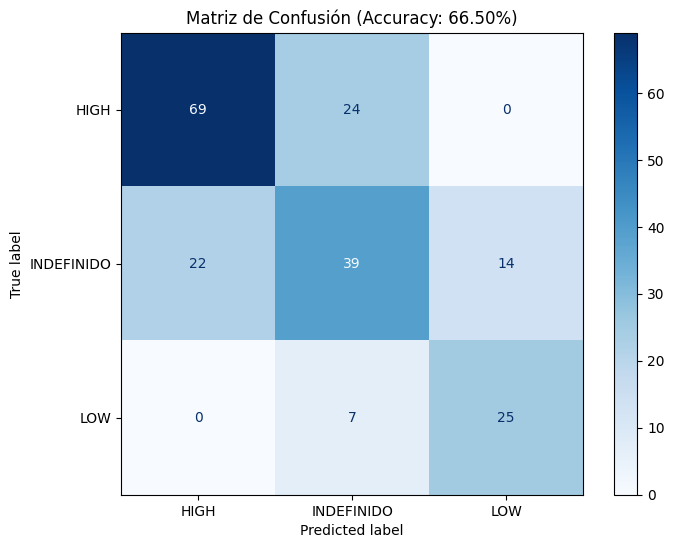


### 📊 REPORTE DE RENDIMIENTO DEL MODELO

**Métricas Globales:**
- **Accuracy (Exactitud):** `0.6650`
- **F1-Score (Weighted):** `0.6632`

**Detalle por Categoría:**

```
              precision    recall  f1-score   support

        HIGH       0.76      0.74      0.75        93
  INDEFINIDO       0.56      0.52      0.54        75
         LOW       0.64      0.78      0.70        32

    accuracy                           0.67       200
   macro avg       0.65      0.68      0.66       200
weighted avg       0.66      0.67      0.66       200

```



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from keras.models import load_model
from keras.utils import plot_model
from sklearn.metrics import (
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report, 
    accuracy_score, 
    f1_score
)

output_pred_probs = classifier.predict(input_test)

output_pred_indices = np.argmax(output_pred_probs, axis=1)
    
output_true_indices = np.argmax(output_test, axis=1)

class_names = encoder.categories_[0]

acc = accuracy_score(output_true_indices, output_pred_indices)
f1 = f1_score(output_true_indices, output_pred_indices, average='weighted')
report = classification_report(output_true_indices, output_pred_indices, target_names=class_names)

fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(output_true_indices, output_pred_indices)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.title(f"Matriz de Confusión (Accuracy: {acc:.2%})")
disp.plot(cmap='Blues', ax=ax)
plt.show()

print("\n" + "="*40)
print("### 📊 REPORTE DE RENDIMIENTO DEL MODELO")
print("="*40)
print(f"\n**Métricas Globales:**")
print(f"- **Accuracy (Exactitud):** `{acc:.4f}`")
print(f"- **F1-Score (Weighted):** `{f1:.4f}`")
print(f"\n**Detalle por Categoría:**\n")
print("```")
print(report)
print("```")
print("\n" + "="*40)

